## Preprocessing

In [1]:
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame
from numpy import nan as NA

In [2]:
germanCredit = pd.read_csv(open('GermanCredit.csv'))
def dropCols(n=3):
    ser = germanCredit[germanCredit == 'none'].count().nlargest(n)
    for key in ser.keys():
        germanCredit.drop([key], axis = 1, inplace = True)

dropCols()
germanCredit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [3]:
germanCredit = germanCredit.applymap(lambda x: str(x).strip("''"))
germanCredit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [4]:
def checkingRep(ser):
    if ser == 'no checking':
        return 'No Checking'
    elif ser == '<0':
        return 'Low'
    elif ser == '0<=X<200':
        return 'Medium'
    elif ser == '>=200':
        return 'High'
germanCredit['checking_status'] = germanCredit['checking_status'].apply(lambda x: checkingRep(x))
germanCredit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [5]:
def savingStatusChange(ser):
    if ser == 'no known savings':
        return 'No Savings'
    elif ser == '<100':
        return 'Low'
    elif ser == '100<=X<500':
        return 'Medium'
    elif ser == '500<=X<1000':
        return 'High'
    elif ser == '>=1000':
        return 'High'
germanCredit['savings_status'] = germanCredit['savings_status'].apply(lambda x: savingStatusChange(x))
germanCredit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [6]:
def classChange(ser):
    if ser == 'good':
        return '1'
    elif ser == 'bad':
        return '0'
germanCredit['class'] = germanCredit['class'].apply(lambda x: classChange(x))
germanCredit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [7]:
def employmentChange(ser):
    if ser == 'unemployed':
        return 'Unemployed'
    elif ser == '<1':
        return 'Amateur'
    elif ser == '1<=X<4':
        return 'Professional'
    elif ser == '4<=X<7':
        return 'Experienced'
    elif ser == '>=7':
        return 'Expert'
germanCredit['employment'] = germanCredit['employment'].apply(lambda x: employmentChange(x))
germanCredit

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


## Analysis

In [8]:
pd.crosstab(germanCredit['class'], germanCredit['foreign_worker'])

foreign_worker,no,yes
class,,
0,4,296
1,33,667


In [9]:
pd.crosstab(germanCredit['savings_status'], germanCredit['employment'])

employment,Amateur,Experienced,Expert,Professional,Unemployed
savings_status,,,,,
High,12,18,34,44,3
Low,120,100,133,210,40
Medium,17,24,22,33,7
No Savings,23,32,64,52,12


In [10]:
copy = germanCredit[germanCredit['personal_status'] == 'male single']
copy = copy[copy['employment'] == 'Experienced']
average = copy[['credit_amount']].astype(float).mean().values[0]
average

4142.592592592592

In [11]:
pd.crosstab(germanCredit['job'], germanCredit['duration'].mean())

col_0,inf
job,
high qualif/self emp/mgmt,148
skilled,630
unemp/unskilled non res,22
unskilled resident,200


In [12]:
gCopy = germanCredit[germanCredit['purpose'] == 'education']
checkingOut = gCopy.groupby(['checking_status']).count().idxmax()[0]
savingsOut = gCopy.groupby(['savings_status']).count().idxmax()[0]
print('Most common checking status: ' + checkingOut)
print('Most common savings status: ' + savingsOut)

Most common checking status: No Checking
Most common savings status: Low


## Visualization

In [13]:
from matplotlib import pyplot as plt

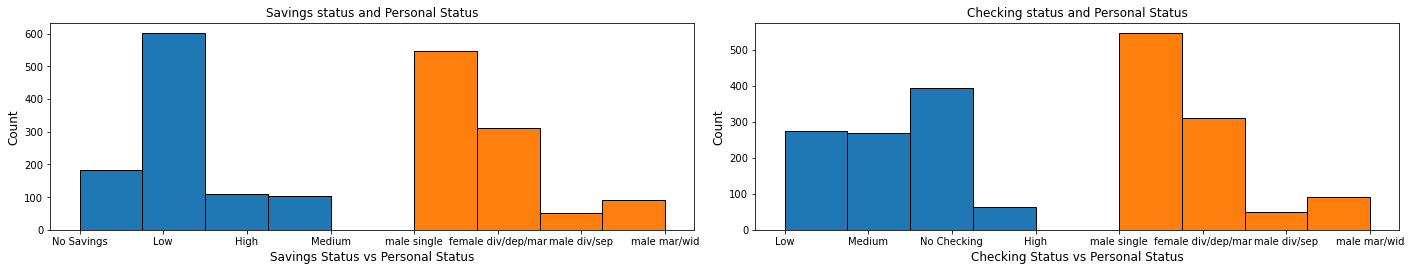

In [14]:
fig, axes = plt.subplots(1,2,figsize=(20,4))
fig.tight_layout(pad = 3.0)
axes[0].set_ylabel('Count', fontsize = 12)
axes[0].set_xlabel('Savings Status vs Personal Status', fontsize = 12)
axes[0].set_title('Savings status and Personal Status')
axes[0].hist(germanCredit['savings_status'], bins = 4, edgecolor = 'black')
axes[0].hist(germanCredit['personal_status'],bins = 4, edgecolor = 'black')

axes[1].set_ylabel('Count', fontsize = 12)
axes[1].set_xlabel('Checking Status vs Personal Status', fontsize = 12)
axes[1].set_title('Checking status and Personal Status')
axes[1].hist(germanCredit['checking_status'], bins = 4, edgecolor = 'black')
axes[1].hist(germanCredit['personal_status'],bins = 4, edgecolor = 'black')
plt.show()

Text(0, 0.5, 'Age')

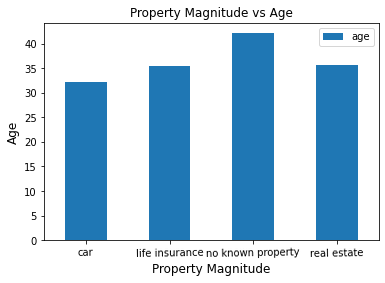

In [15]:
clone = germanCredit[germanCredit['credit_amount'].astype(int) > 4000]
clone = clone.astype({'age':int})
useThis = clone.groupby(['property_magnitude']).mean()
plot = useThis.plot(kind = 'bar', rot = 1, title = 'Property Magnitude vs Age')
plot.set_xlabel('Property Magnitude', fontsize = 12)
plot.set_ylabel('Age', fontsize = 12)

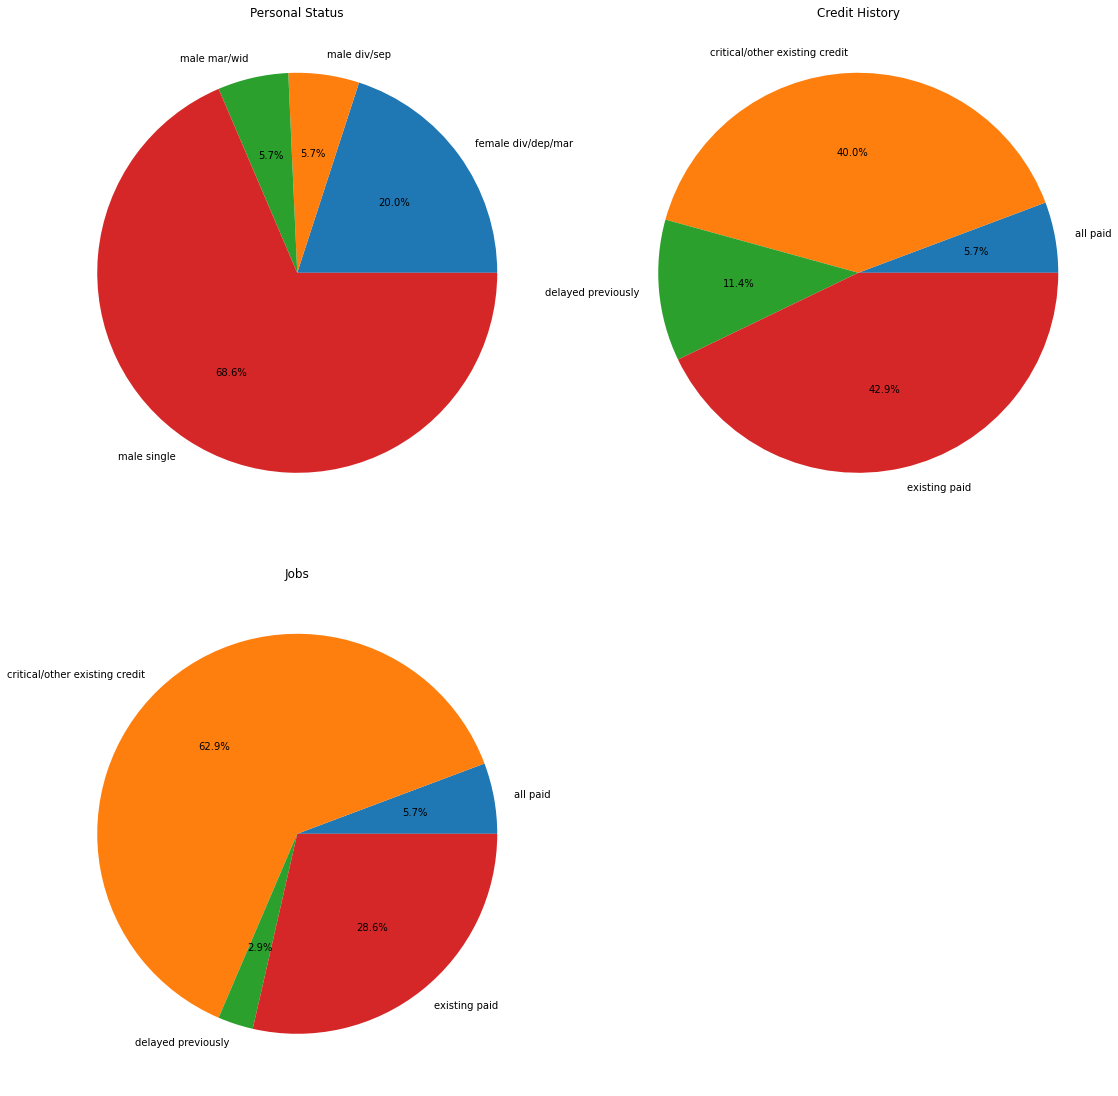

In [64]:
high = germanCredit[germanCredit['savings_status'] == 'High']
high40 = high[high['age'].astype(int) > 40]

fig, axes = plt.subplots(2,2,figsize=(16,16))
fig.tight_layout(pad = 3.0)

pstats = high40.groupby(['personal_status'])['checking_status'].count()
axes[0][0].pie(pstats, labels = pstats.keys(), autopct='%1.1f%%')
axes[0][0].set_title('Personal Status', fontsize = 12)

chist = high40.groupby(['credit_history'])['checking_status'].count()
axes[0][1].pie(chist, labels = chist.keys(), autopct = '%1.1f%%')
axes[0][1].set_title('Credit History', fontsize = 12)

jobs = high40.groupby(['job'])['checking_status'].count()
axes[1][0].pie(jobs, labels = chist.keys(), autopct = '%1.1f%%')
axes[1][0].set_title('Jobs', fontsize = 12)
axes[1][1].set_axis_off()
plt.show()